In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("./Datasets/scorePridiction.csv")

# EDA


In [75]:
# Remove whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from string values in object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [76]:
df.shape

(260920, 15)

In [77]:
df.duplicated().sum()

0

In [78]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total
0,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,1,0.0,1.0,1.0,1,0,1
1,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,2,0.1,1.0,2.0,1,1,1
2,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,3,0.2,2.0,3.0,2,1,2
3,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,4,0.3,2.0,4.0,2,2,2
4,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,5,0.4,2.0,5.0,2,2,2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             260920 non-null  int64  
 1   date            260920 non-null  object 
 2   venue           260920 non-null  object 
 3   bat_team        260920 non-null  object 
 4   bowl_team       260920 non-null  object 
 5   batsman         260920 non-null  object 
 6   bowler          260920 non-null  object 
 7   runs            260920 non-null  int64  
 8   wickets         260920 non-null  int64  
 9   overs           260920 non-null  float64
 10  runs_last_5     260920 non-null  float64
 11  wickets_last_5  260920 non-null  float64
 12  striker         260920 non-null  int64  
 13  non_striker     260920 non-null  int64  
 14  total           260920 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 29.9+ MB


# Observations

- There are no null values in the data set.
- Total of 260920 rows of records in the data.
- Average Score is 157.21.


In [80]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.332807,120.605442,9.460126,37.124601,120.605442,157.219895,157.219025,157.219895
std,3.679913e+05,1.626416,70.063473,5.686156,13.939299,70.063473,99.633758,99.634140,99.633758
min,3.359820e+05,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,0.000000,60.000000,4.400000,29.000000,60.000000,71.000000,71.000000,71.000000
50%,9.809670e+05,1.000000,120.000000,9.300000,37.000000,120.000000,153.000000,153.000000,153.000000
75%,1.254066e+06,1.000000,180.000000,14.300000,46.000000,180.000000,235.000000,235.000000,235.000000
max,1.426312e+06,7.000000,269.000000,19.900000,113.000000,269.000000,549.000000,549.000000,549.000000


In [81]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non_striker', 'total'],
      dtype='object')

In [82]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [83]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

##### Observations

- There Are Some Teams `['Pune Warriors', 'Kochi Tuskers Kerala','Rising Pune Supergiants', 'Gujarat Lions', 'Rising Pune Supergiant']` That Doesn't Play Now. So We Can Remove Them.
- Teams Like `['Deccan Chargers','Delhi Daredevils']` changed their name to `['Sunrisers Hyderabad',
'Delhi Capitals']` So We Can Combine Records of Both By Replacing Deccan Chargers with Sunrisers Hyderabaed.


In [84]:
temp = df.copy()

In [85]:
# Current Playing Teams (Till 2024 IPL Season)
teams = [
    'Chennai Super Kings',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Delhi Capitals',
    'Rajasthan Royals',
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Lucknow Super Giants',
    'Gujarat Titans',
]

In [86]:
# Replace old team names with new ones
temp['bowl_team'] = temp['bowl_team'].replace({
    'Punjab Kings': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

# Same for 'bat_team'
temp['bat_team'] = temp['bat_team'].replace({
    'Punjab Kings': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

In [87]:
# Filter out teams that no longer play
temp = temp[(temp['bat_team'].isin(teams)) & (temp['bowl_team'].isin(teams))]

In [88]:
temp.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [89]:
temp.bowl_team.unique()

array(['Royal Challengers Bengaluru', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [90]:
df = temp

In [91]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

# Removing First 5 Overs Data in Every Match


In [92]:
temp = df.copy()

In [93]:
df = df[df['overs'] >= 5.0]

In [94]:
temp.shape, df.shape

((233901, 15), (172643, 15))

In [95]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non_striker', 'total'],
      dtype='object')

In [96]:
df.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total
32,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,Z Khan,1,33,5.0,59.0,33.0,61,60,61
33,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,SC Ganguly,Z Khan,0,34,5.1,59.0,34.0,61,61,61
34,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,RT Ponting,Z Khan,0,35,5.2,59.0,35.0,61,61,61


In [97]:
# Checking Unique Values In Every Columns
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values")

Column mid has 979 unique values
Column date has 769 unique values
Column venue has 55 unique values
Column bat_team has 10 unique values
Column bowl_team has 10 unique values
Column batsman has 636 unique values
Column bowler has 504 unique values
Column runs has 8 unique values
Column wickets has 235 unique values
Column overs has 148 unique values
Column runs_last_5 has 98 unique values
Column wickets_last_5 has 235 unique values
Column striker has 507 unique values
Column non_striker has 507 unique values
Column total has 507 unique values


# Dropping Unnecessary Columns

1. Batsman : Players Gets Removed and Added In Every Match. Having Data Only For 636 Players Is Not Enough.
2. Bowler: Less Data Contains Only 504 Bowlers.
3. mid: ID of match (Not Required For Prediction)
4. striker : Batsman on strike (Same Reason as Col batsman and bowler)
5. non-striker: Same Reason as Col batsman and bowler.
   <br><br>
   ➡️ Date : It is also not required but we will use it to split the data based on season.


In [98]:
# columns = ['mid', 'batsman', 'bowler', 'striker', 'non_striker', 'venue']
columns = ['batsman', 'bowler', 'striker', 'non_striker', 'venue']
df.drop(columns, inplace=True, axis=1)

In [99]:
df.head()

,mid,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,335982,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,1,33,5.0,59.0,33.0,61
33,335982,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,34,5.1,59.0,34.0,61
34,335982,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,35,5.2,59.0,35.0,61
35,335982,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,36,5.3,59.0,36.0,61
36,335982,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,37,5.4,58.0,37.0,61


##### Date


In [60]:
df.date.dtype

dtype('O')

In [61]:
df.date.head()

32    2008-04-18
33    2008-04-18
34    2008-04-18
35    2008-04-18
36    2008-04-18
Name: date, dtype: object

In [62]:
df['season'] = df['date'].apply(lambda x: x.split('-')[0]).astype(int)

In [63]:
df['season']

32        2008
33        2008
34        2008
35        2008
36        2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 172643, dtype: int32

C:\Users\avina\AppData\Local\Temp\ipykernel_21084\2466594152.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_per_season = df.groupby('season').apply(


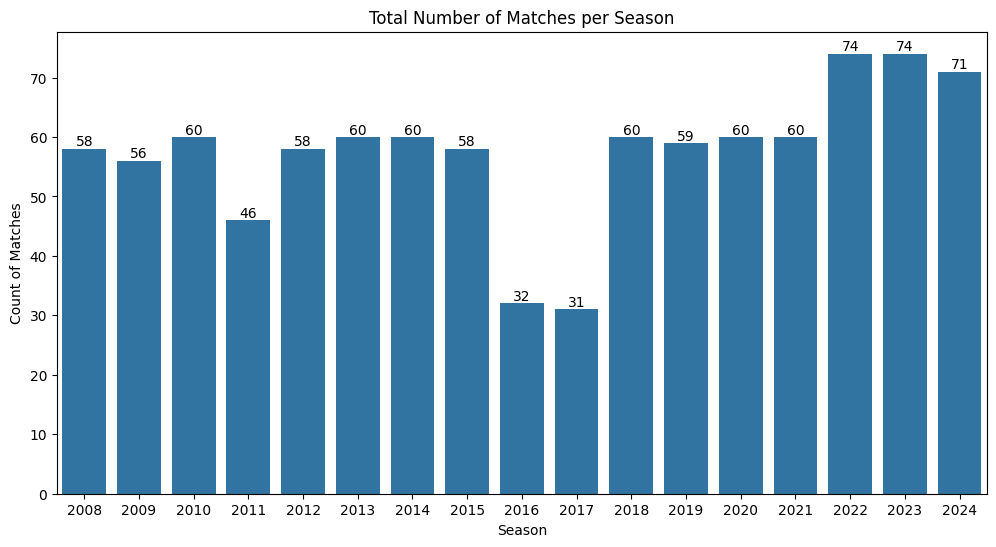

In [ ]:
matches_per_season = df.groupby('season').apply(
    lambda x:  round(x[['date', 'bat_team', 'bowl_team']
                       ].drop_duplicates().shape[0]/2)
).reset_index(name='match_count')


matches_per_season = matches_per_season[['season', 'match_count']]


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season', y='match_count', data=matches_per_season)
ax.bar_label(ax.containers[0])
plt.title('Total Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Count of Matches')
plt.show()

In [ ]:
df.drop('date', inplace=True, axis=1)

In [ ]:
# Average Score By Each Team
pd.DataFrame(df.groupby(['bat_team'])['total'].mean())

In [ ]:
# One Hot Encoding
df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [ ]:
df.head()

Correlation


In [ ]:
df.season

In [ ]:
# ## Splliting Data
# X_train = df[df['season']<=2015]
# X_train = X_train.drop(['total','season'],axis=1)

# y_train = df[df['season']<=2015]
# y_train = y_train['total']

# X_test = df[df['season']>2015]
# X_test = X_test.drop(['total','season'],axis=1)

# y_test = df[df['season']>2015]
# y_test = y_test['total']

In [ ]:
# Shuffling Dataset
from sklearn.model_selection import train_test_split
df = df.sample(df.shape[0])

# Splitting Using Train Test Split
X = df.drop(['total', 'season'], axis=1)
y = df['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# from sklearn.model_selection import KFold
# kf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=None)

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = y[train_index], y[test_index]

In [ ]:
X_train.shape

In [ ]:
y_train.head()

In [ ]:
X_test.shape

In [ ]:
y_test.head()

In [ ]:
X_train.head()

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(40, 15))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [ ]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## MODEL TRAINING


Training Model With Base Parameters


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2_scores = {}
mae = {}

In [ ]:
######### LINEAR REGRESSION ###########
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, lr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['Linear Regression'] = r2_score(y_test, predictions)
mae['Linear Regression'] = mean_absolute_error(y_test, predictions)

sns.distplot(y_test-predictions)

In [ ]:
########## DECISION TREES ########
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, max_features=3, random_state=42)
dtr.fit(X_train, y_train)

predictions = dtr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, dtr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['DecisionTreeRegressor'] = r2_score(y_test, predictions)
mae['DecisionTreeRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

In [ ]:
########## RANDOM FOREST  ########
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=15,
                           n_estimators=100, max_features='auto', min_samples_split=5)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, rf.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['RandomForestRegressor'] = r2_score(y_test, predictions)
mae['RandomForestRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

In [ ]:
######### EXTRA TREE REGRESSOR ########
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(max_depth=15, n_estimators=100,
                          max_features='auto', min_samples_split=5)
etr.fit(X_train, y_train)

predictions = etr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, etr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')

print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['ExtraTreesRegressor'] = r2_score(y_test, predictions)
mae['ExtraTreesRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

In [ ]:
################### GradientBoostingRegressor ###############
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predictions = gbr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, gbr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))


r2_scores['GradientBoostingRegressor'] = r2_score(y_test, predictions)
mae['GradientBoostingRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

In [ ]:
################### XGBRegressor ###############
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, xgb.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['XGBRegressor'] = r2_score(y_test, predictions)
mae['XGBRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

In [ ]:
# Comparing Different R2 Scores
plt.figure(figsize=(16, 6))
scores = pd.DataFrame(r2_scores.items(), columns=['Model', 'Accuracy'])
ax = sns.barplot(data=scores.sort_values(
    "Accuracy", ascending=False), x='Model', y='Accuracy')
ax.bar_label(ax.containers[0])

In [ ]:
# Comparing Different MAE
plt.figure(figsize=(16, 6))
scores = pd.DataFrame(mae.items(), columns=['Model', 'MAE'])
ax = sns.barplot(data=scores.sort_values(
    "MAE", ascending=True), x='Model', y='MAE')
ax.bar_label(ax.containers[0])

So Linear Regression Gives Least MAE with Highest Accuracy.


In [ ]:
pd.set_option('display.max_columns', 2000)
X_test.head()

### Predicting On New Situations


In [ ]:
# Actual 147
data = [68, 3, 10.2, 29, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

In [ ]:
# Actual 160
data = [100, 3, 13.1, 42, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

In [ ]:
# Actual 202
data = [180, 2, 18, 70, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

In [ ]:
import pickle
file_name = 'predict_ipl_1st_innings_score_etr.pkl'
pickle.dump(etr, open(file_name, 'wb'))

In [ ]:
loaded_model = pickle.load(open("predict_ipl_1st_innings_score_etr.pkl", "rb"))
pred = loaded_model.predict(X_test)
print(r2_score(y_test, pred))
print('MAE:{}'.format(mean_absolute_error(y_test, pred)))
print('MSE:{}'.format(mean_squared_error(y_test, pred)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, pred))))